# Exploration of Yelp dataset

## Introduction

Every heard of the phrase "Yelp makes or breaks a business"? 

The Yelp Dataset Challenge is a analysis challenge given by Yelp for students to conduct research/ analysis on their data to uncover insights hidden in their data. In this project of mine, I will be exploring the Yep business and Yelp reviews dataset given by Yelp to try and answer the question of how impactful early reviews are to a business; and to show any interesting insights I discover along the way. Ultimately, the goal of this project is to answer the question of: Given the average star rating of the first 5 reviews, how is it associated to additional review counts in the future?

Let's get started!

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')
%matplotlib inline

## 1st dataset: Yelp Business

In [3]:
# reading in the data

yelp_bus = pd.read_csv('data/yelp_business.csv')

In [4]:
# first look

yelp_bus.head(8)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods


In [5]:
# closer look

yelp_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


Lots of missing values for neighborhood. The rest looks fine.

In [6]:
# descriptive statistics summary

yelp_bus.describe(include = 'all')

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
count,174567,174567,68015,174567,174566,174566,173944,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000,174567
unique,174567,132619,408,138564,1093,67,16004,NaN,NaN,NaN,NaN,NaN,76419
top,6m82IjcZEp72P-PVQijElA,"""Starbucks""",Westside,"""""",Las Vegas,AZ,89109,NaN,NaN,NaN,NaN,NaN,Restaurants;Pizza
freq,1,936,3500,6442,26775,52214,2965,NaN,NaN,NaN,NaN,NaN,990
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.627312,-92.679009,3.632196,30.137059,0.840376,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.389012,26.240079,1.003739,98.208174,0.366258,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.086009,-142.466650,1.000000,3.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.631550,-112.125879,3.000000,4.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.144257,-89.410128,3.500000,8.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.606181,-79.657609,4.500000,23.000000,1.000000,NaN


## Rating Distribution

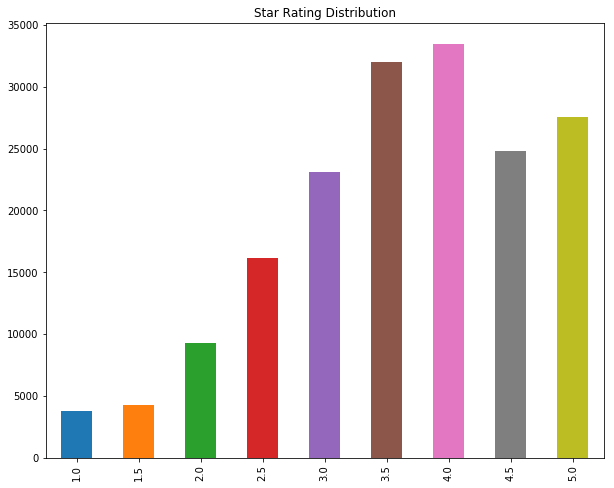

In [7]:
# rating distribution
star_rating = yelp_bus['stars'].value_counts().sort_index()
star_rating.plot(
    kind='bar',
    figsize = (10,8),
    title = "Star Rating Distribution",
);

## Average Review Count for Each Star Rating

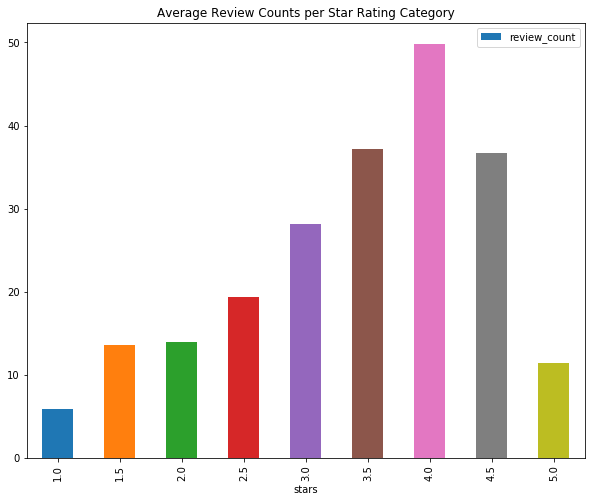

In [8]:
# looking at the relationship between stars and review_count

revcount_per_star= yelp_bus.groupby('stars').mean().reset_index()

revcount_per_star.plot(
    kind = 'bar',
    x = 'stars',
    y = 'review_count',
    figsize = (10,8),
    title = 'Average Review Counts per Star Rating Category',
    
);

## Review count distribution

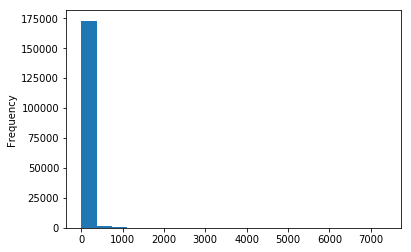

In [10]:
# plotting

yelp_bus['review_count'].plot(
        kind= 'hist',
        bins = 20,
        
);

Extremely right skewed. Try winsorizing it at 95%

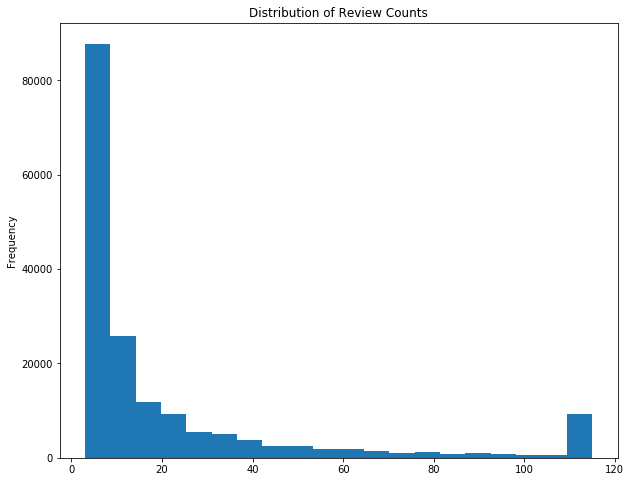

In [11]:
# plotting after winsorizing

yelp_bus ['review_count'] = winsorize (yelp_bus['review_count'], (None, 0.05), inplace = False)

yelp_bus['review_count'].plot(
        kind= 'hist',
        bins = 20,
        title = 'Distribution of Review Counts',
        figsize = (10,8)
        
);

Majority of businesses has less than 20 reviews

In [12]:
# what percentage of businesses have have less or equal to n reviews?

perc = round(len(yelp_bus [(yelp_bus['review_count'] <= 10)])/ len (yelp_bus)*100, 1)
print(perc, 'percent of businesses has less than or equal to 10 reviews')

perc = round(len(yelp_bus [(yelp_bus['review_count'] <=5)])/ len (yelp_bus)*100, 1)
print(perc, 'percent of businesses has less than or equal to 5 reviews')


56.6 percent of businesses has less than or equal to 10 reviews
35.8 percent of businesses has less than or equal to 5 reviews


## Most popular state on Yelp

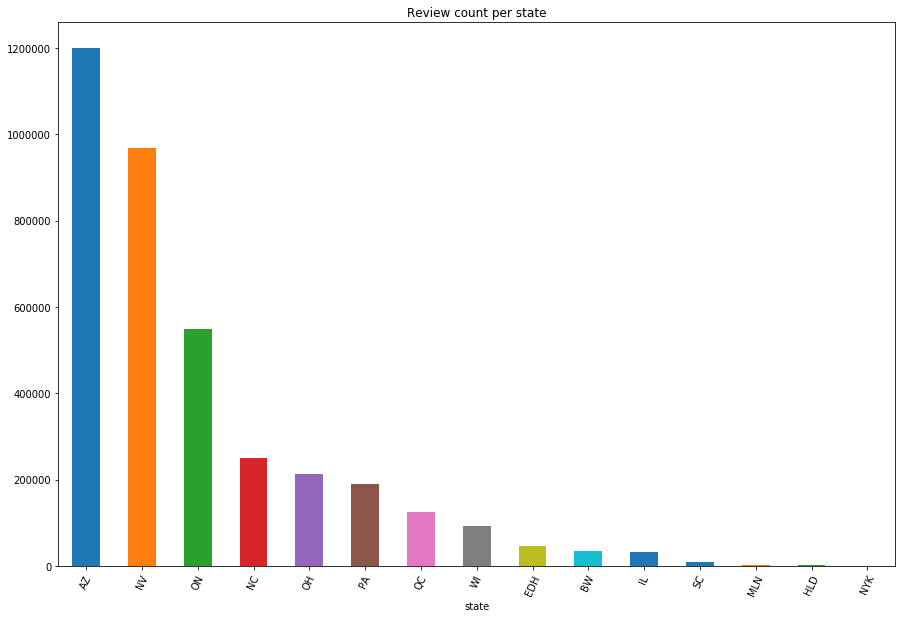

In [13]:
# which state is the most popular (by review count)?

state_count= yelp_bus.groupby('state')['review_count'].sum().sort_values(ascending = False).head(15)

state_count.plot(
    kind = 'bar',
    x = 'state',
    y = 'city',
    figsize = (15,10),
    title = 'Review count per state',
    rot = 65,
);

## Most popular city on Yelp

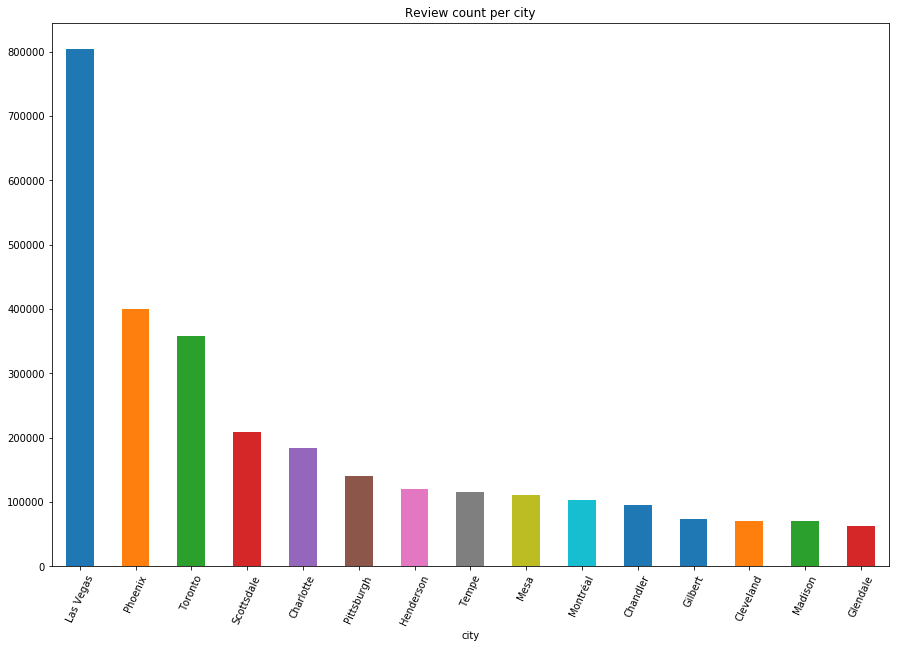

In [14]:
# which city is the most popular (by review count)?

city_count= yelp_bus.groupby('city')['review_count'].sum().sort_values(ascending = False).head(15)

city_count.plot(
    kind = 'bar',
    x = 'state',
    y = 'city',
    figsize = (15,10),
    title = 'Review count per city',
    rot = 65,
);

## Types of businesses (categories)

In [15]:
all_cats = ' '.join(yelp_bus['categories'])
bus_cats = pd.DataFrame(all_cats.split(';'), columns = ['category'])
cats = bus_cats['category'].value_counts()

print('There are',len(cats), 'types of businesses in our Yelp Business Dataset')


There are 59106 types of businesses in our Yelp Business Dataset


What's the most popular type of business being reviewed?

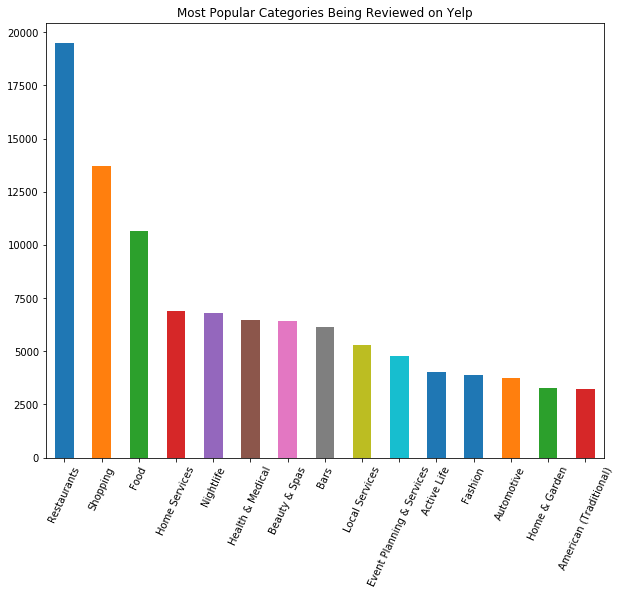

In [14]:
cats.head(15).plot(
    kind = 'bar',
    figsize = (10,8),
    rot = 65,
    title = 'Most Popular Categories Being Reviewed on Yelp'
);

## Missing Data

In [15]:
#showing percentage of missing data

total = yelp_bus.isnull().sum().sort_values(ascending = False)
percent = (yelp_bus.isnull().sum()/ yelp_bus.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Missing Data Count', 'Percentage'])
missing_data

,Missing Data Count,Percentage
neighborhood,106552,0.610379
postal_code,623,0.003569
longitude,1,0.000006
latitude,1,0.000006
state,1,0.000006
city,1,0.000006
categories,0,0.000000
is_open,0,0.000000
review_count,0,0.000000
stars,0,0.000000


In [16]:
# Dropping columns from our dataset

drop_columns = ['neighborhood', 'address', 'postal_code' ,'latitude' ,'longitude']
yelp_bus.drop(drop_columns, axis = 1, inplace = True)


In [17]:
# The dataset now looks like

yelp_bus.head(15)

,business_id,name,city,state,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,3.5,115,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Las Vegas,NV,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Las Vegas,NV,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",Wexford,PA,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",Henderson,NV,5.0,7,1,Automotive;Auto Detailing


# 2nd Dataset : Yelp Users

In [18]:
# Reading in the data

yelp_rev = pd.read_csv('data/yelp_review.csv')

In [19]:
## take a look

yelp_rev.head(8)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0


In [20]:
# descriptive statistic summary

pd.options.display.float_format = "{:.2f}".format
yelp_rev.describe( include = 'all')

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
count,5261668,5261668,5261668,5261668.00,5261668,5261668,5261668.00,5261668.00,5261668.00
unique,5261668,1326101,174567,nan,4547,5258354,nan,nan,nan
top,lVMV7sek0q316qbhknDCSA,CxDOIDnH8gp9KXzpBHJYXw,4JNXUYY8wbaaDmk3BPzlWw,nan,2017-08-12,BE WARNED about the NEW REWARD PROGRAM being p...,nan,nan,nan
freq,1,3569,7362,nan,4614,17,nan,nan,nan
mean,NaN,NaN,NaN,3.73,NaN,NaN,1.39,0.51,0.59
std,NaN,NaN,NaN,1.43,NaN,NaN,4.53,2.69,2.23
min,NaN,NaN,NaN,1.00,NaN,NaN,-1.00,0.00,-1.00
25%,NaN,NaN,NaN,3.00,NaN,NaN,0.00,0.00,0.00
50%,NaN,NaN,NaN,4.00,NaN,NaN,0.00,0.00,0.00
75%,NaN,NaN,NaN,5.00,NaN,NaN,2.00,0.00,1.00


5,261,668 unique reviews

1,326,101 unique users

174,567 unique businesses (same number as our first data set)

## Number of reviews people give

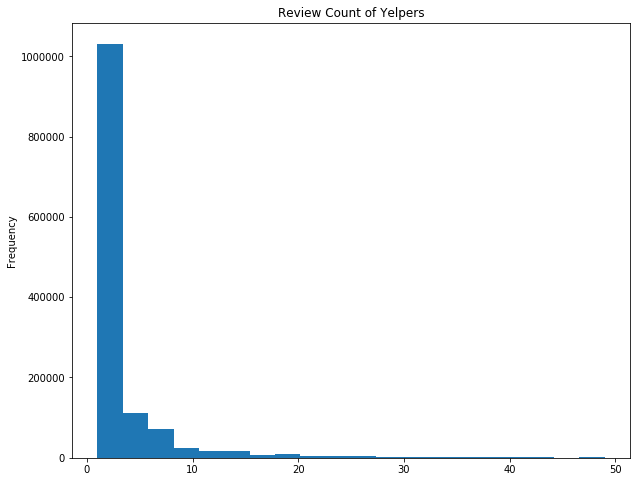

In [21]:
# plotting

rev_count = yelp_rev['user_id'].value_counts()

rev_count[rev_count <50 ].plot(
    kind = 'hist',
    bins = 20,
    title = 'Review Count of Yelpers',
    figsize = (10,8)
        
);

Again, distribution is heavily right skewed where a majority of people leaving less than 10 reviews

In [22]:
# what percentage of people leave less than a certain number of reviews?

perc = round(len(rev_count [rev_count < 14]) / len (rev_count)*100, 1)
print(perc, 'percent of people leave less than 14 reviews')

perc = round(len(rev_count [rev_count < 8]) / len (rev_count)*100, 1)
print(perc, 'percent of people leave less than 5 reviews')

perc = round(len(rev_count [rev_count == 1]) / len (rev_count)*100, 1)
print(perc, 'percent of people leave only 1 review')

95.4 percent of people leave less than 14 reviews
90.3 percent of people leave less than 5 reviews
52.7 percent of people leave only 1 review


95th percentile is at 14 reviews.

Over 50% of people leave only 1 review. 

So why is this important? Hypothesis: They leave one review because they have a highly positive or negative experience.

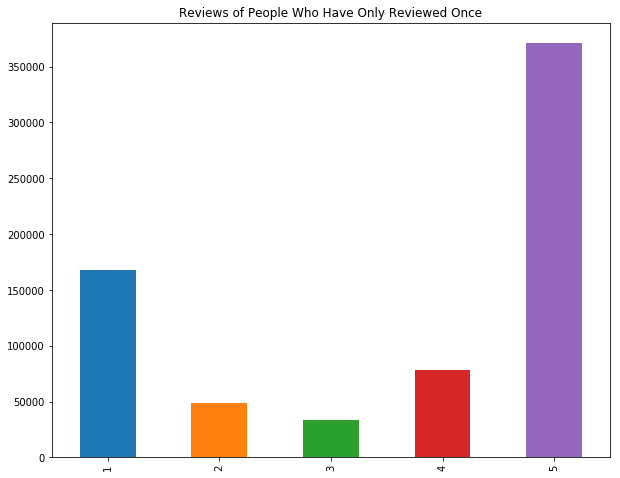

In [24]:
# filtering yelp_rev to only people who only leave one review

# dataframe of reviewers with one review count
rev_1 = rev_count[rev_count == 1]
rev_1 = pd.DataFrame(rev_1.index)
rev_1.columns = ['user_id']

# plotting the reviews of these yelpers

yelp_1 = pd.merge(yelp_rev, rev_1 , on = 'user_id')
yelp_1_count = yelp_1['stars'].value_counts().sort_index()
yelp_1_count.plot(
    kind = 'bar',
    figsize = (10,8),
    title = 'Reviews of People Who Have Only Reviewed Once'
);





Higher counts for 1 star and 5 stars. We can assume yelpers tend to leave reviews after a highly positive/negative experience

## Aspect of time in reviews

In [25]:
# getting the number of reviews in each month

times = pd.DatetimeIndex(yelp_rev['date'])
rev_time = yelp_rev.groupby([times.year.rename('year'), times.month.rename('month')]).size().reset_index(name = 'counts')
rev_time.head(15)

,year,month,counts
0,2004,7,1
1,2004,9,1
2,2004,10,9
3,2004,12,3
4,2005,1,7
5,2005,2,1
6,2005,3,51
7,2005,4,53
8,2005,5,69
9,2005,6,26


In [26]:
# getting the time data set

rev_time['month'] = rev_time['month'].astype(str).map(lambda x: "0"+x if len(x)==1 else x)
rev_time['date'] = rev_time['year'].astype(str) + rev_time['month'].astype(str)
rev_time['date'] = pd.to_datetime(rev_time['date'] , format = '%Y%m')
rev_time.head(15)

,year,month,counts,date
0,2004,07,1,2004-07-01
1,2004,09,1,2004-09-01
2,2004,10,9,2004-10-01
3,2004,12,3,2004-12-01
4,2005,01,7,2005-01-01
5,2005,02,1,2005-02-01
6,2005,03,51,2005-03-01
7,2005,04,53,2005-04-01
8,2005,05,69,2005-05-01
9,2005,06,26,2005-06-01


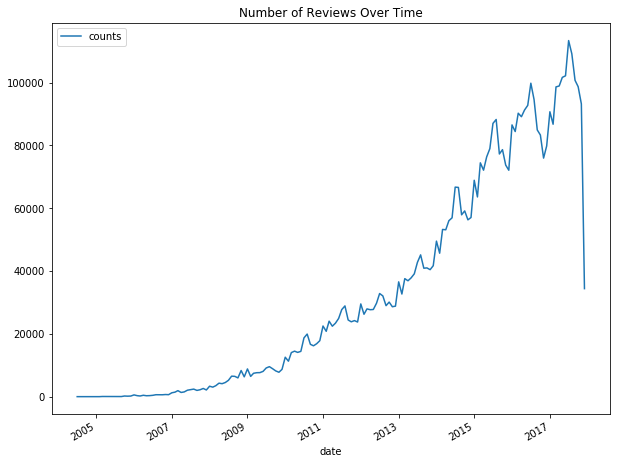

In [27]:
#plotting number of reviews over time

rev_time.plot(
        kind  = 'line',
        x = 'date',
        y = 'counts',
        figsize= (10,8),
        title = 'Number of Reviews Over Time'
);

We know that Yelp has provided us with less data nearing 2018.

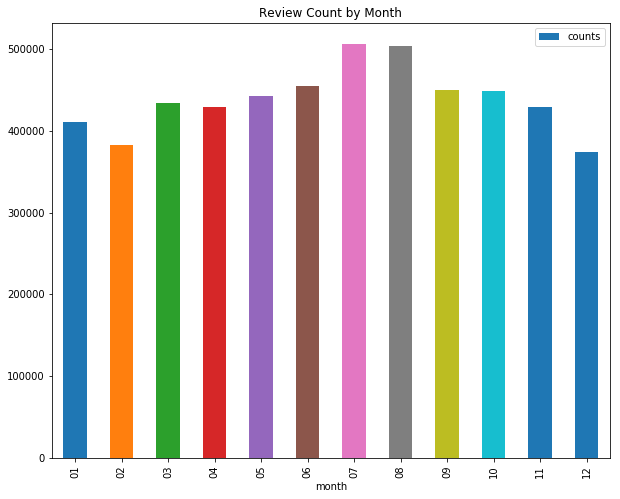

In [28]:
# Which month has the most reviews?

rev_month = rev_time.groupby('month').sum().reset_index()
rev_month.plot(
        kind = 'bar',
        x = 'month',
        y = 'counts',
        figsize = (10,8),
        title = 'Review Count by Month'
);
    

Summer months has greater review counts!

## How long does it take to get to 5 reviews?

In [30]:
# dataframe of businesses with at least 5 reviews

bus_rev_count = yelp_rev['business_id'].value_counts() 
bus_rev_more5 = pd.DataFrame(bus_rev_count [bus_rev_count >= 5].index)
bus_rev_more5.columns = ['business_id']

In [31]:
# filtering yelp_rev to exclude businesses with less than 5 reviews

yelp_morethan_5 = pd.merge(yelp_rev, bus_rev_more5 , on = 'business_id')
yelp_morethan_5.head()


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...",9,0,3
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,"Stopped by for the Wilensky's Special, loved i...",0,0,0
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,"I have to admit, I am a fan. Just entering the...",4,0,1


In [32]:
# how many reviews did we take out?

print("We took out" ,len(yelp_rev) - len (yelp_morethan_5), "reviews")
print("We are now also working with", len(yelp_morethan_5['business_id'].value_counts()), "businesses")

We took out 165664 reviews
We are now also working with 125044 businesses


In [33]:
# changing the date column into date types and sorting the data set by ascending dates

yelp_morethan_5['date'] = pd.DatetimeIndex(yelp_morethan_5['date'])
yelp_morethan_5.sort_values(by = 'date', inplace = True)
yelp_morethan_5 = yelp_morethan_5.reset_index(drop = True)


In [34]:
# filtering the data set to only include the first 5 reviews for each business

yelp_first_5 = yelp_morethan_5.groupby('business_id').head()
yelp_first_5.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,PbIY2aIyszb6he6J-ey67w,le_brG6cwrzvWdKEGqA7YA,uz7UbvVUwsg68Rok6kbqRg,5,2004-07-22,"Sehr gutes Restaurant, leckeres essen und nett...",0,0,0
1,03B9-gqbeGoMmPJbNzNT5w,w_6miJytUt6z8oRkGjVG-A,9X-43jnj6-6ZBuBdFm7BLA,2,2004-09-15,Viel Auswahl täuscht über die wahre Tatsache h...,0,0,0
2,_CRpX4FGBkxie_1q0-DbjQ,sE3ge33huDcNJGW3V4obww,PD2MAlYYi9HCqPH7IBKwTg,5,2004-10-12,Hole in the wall burrito joint with the BEST b...,1,0,1
3,JDBubAcRw4FXfg1c5xk-dA,c6HT44PKCaXqzN_BdgKPCw,u8C8pRvaHXg3PgDrsUHJHQ,5,2004-10-19,Best pizza I've ever had. My favorite is the ...,2,0,0
4,0O7kc-T1SrZpF84jMOyeOg,yYSBB5q7bY-qSVvmMgk4FA,GCRvrxMSC1nzShyM4Y-guQ,5,2004-10-19,"New club in the Hard Rock, and currently the h...",0,0,0


In [35]:
# dataframe of dates of first review per business

first_date = yelp_first_5.groupby('business_id')['date'].min().reset_index()
first_date.columns = ['business_id' , 'first_review_date']
first_date.head()

,business_id,first_review_date
0,--6MefnULPED_I942VcFNA,2008-08-07
1,--7zmmkVg-IMGaXbuVd0SQ,2014-12-30
2,--9QQLMTbFzLJ_oT-ON3Xw,2013-05-15
3,--9e1ONYQuAa-CB_Rrw7Tw,2005-04-27
4,--DaPTJW3-tB1vP-PfdTEg,2012-06-04


In [36]:
# merging with bus_rev_more5 to get dataframe of 1st review date of businesses with at least 5 reviews

bus_rev_more5 = pd.merge(bus_rev_more5, first_date, on = 'business_id')
bus_rev_more5.head()

,business_id,first_review_date
0,4JNXUYY8wbaaDmk3BPzlWw,2005-10-10
1,RESDUcs7fIiihp38-d6_6g,2012-09-10
2,K7lWdNUhCbcnEvI0NhGewg,2010-12-18
3,cYwJA2A6I12KNkm2rtXd5g,2012-12-23
4,DkYS3arLOhA8si5uUEmHOw,2007-10-08


In [37]:
# dataframe of date of 5th review per business

fifth_date = yelp_first_5.groupby('business_id')['date'].max().reset_index()
fifth_date.columns = ['business_id' , 'fifth_review_date']
fifth_date.head()

,business_id,fifth_review_date
0,--6MefnULPED_I942VcFNA,2011-01-08
1,--7zmmkVg-IMGaXbuVd0SQ,2015-06-07
2,--9QQLMTbFzLJ_oT-ON3Xw,2016-04-02
3,--9e1ONYQuAa-CB_Rrw7Tw,2006-03-23
4,--DaPTJW3-tB1vP-PfdTEg,2013-07-06


In [38]:
# merging with bus_rev_more5

bus_rev_more5 = pd.merge(bus_rev_more5, fifth_date, on = 'business_id')
bus_rev_more5.head()

,business_id,first_review_date,fifth_review_date
0,4JNXUYY8wbaaDmk3BPzlWw,2005-10-10,2006-01-31
1,RESDUcs7fIiihp38-d6_6g,2012-09-10,2012-09-12
2,K7lWdNUhCbcnEvI0NhGewg,2010-12-18,2010-12-21
3,cYwJA2A6I12KNkm2rtXd5g,2012-12-23,2012-12-26
4,DkYS3arLOhA8si5uUEmHOw,2007-10-08,2008-01-11


In [39]:
# adding column of days took for 5 reviews

bus_rev_more5['days_for_5_reviews'] = bus_rev_more5['fifth_review_date'] - bus_rev_more5['first_review_date']
bus_rev_more5.head()

,business_id,first_review_date,fifth_review_date,days_for_5_reviews
0,4JNXUYY8wbaaDmk3BPzlWw,2005-10-10,2006-01-31,113 days
1,RESDUcs7fIiihp38-d6_6g,2012-09-10,2012-09-12,2 days
2,K7lWdNUhCbcnEvI0NhGewg,2010-12-18,2010-12-21,3 days
3,cYwJA2A6I12KNkm2rtXd5g,2012-12-23,2012-12-26,3 days
4,DkYS3arLOhA8si5uUEmHOw,2007-10-08,2008-01-11,95 days


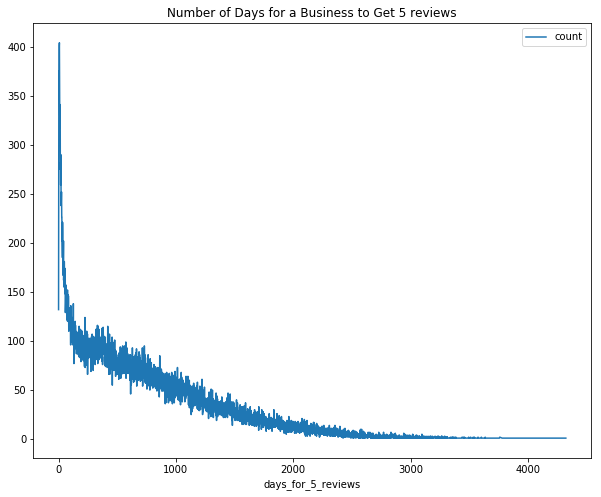

In [40]:
# graphing number of days for a business to get 5 review

df = bus_rev_more5['days_for_5_reviews'].value_counts().sort_index().reset_index()
df.columns = ['days_for_5_reviews', 'count']
df['days_for_5_reviews'] = df['days_for_5_reviews'].dt.days
df.plot(
    kind = 'line',
    x = 'days_for_5_reviews',
    y = 'count',
    figsize = (10,8),
    title = 'Number of Days for a Business to Get 5 reviews'
);


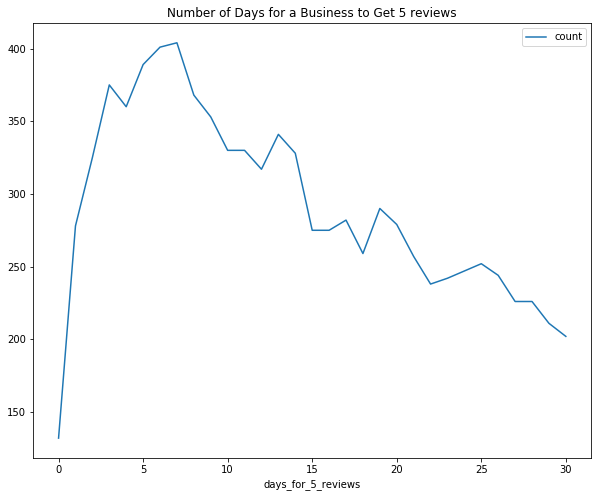

In [41]:
# graphing number of days for a business to get 5 review within a month period

df = bus_rev_more5[bus_rev_more5['days_for_5_reviews']<= pd.Timedelta('30 days')]
df = df['days_for_5_reviews'].value_counts().sort_index().reset_index()
df.columns = ['days_for_5_reviews', 'count']
df['days_for_5_reviews'] = df['days_for_5_reviews'].dt.days
df.plot(
    kind = 'line',
    x = 'days_for_5_reviews',
    y = 'count',
    figsize = (10,8),
    title = 'Number of Days for a Business to Get 5 reviews'
);

It peaks at 7 days!

## Given the average star rating of the first 5 reviews, how is it associated to additional review counts in the future?

In [42]:
# dataframe of star rating of first 5 reviews

star_rating_first_5 = yelp_first_5.groupby('business_id')['stars'].mean().reset_index()
star_rating_first_5.columns = ['business_id', 'avg_rating_first_5']
star_rating_first_5.head()

,business_id,avg_rating_first_5
0,--6MefnULPED_I942VcFNA,3.00
1,--7zmmkVg-IMGaXbuVd0SQ,3.80
2,--9QQLMTbFzLJ_oT-ON3Xw,4.20
3,--9e1ONYQuAa-CB_Rrw7Tw,5.00
4,--DaPTJW3-tB1vP-PfdTEg,4.20


In [43]:
# getting number of review count per business

yelp_rev_2 = yelp_rev['business_id'].value_counts().reset_index()
yelp_rev_2.columns = ['business_id', 'review_count']
yelp_rev_2.head()

,business_id,review_count
0,4JNXUYY8wbaaDmk3BPzlWw,7362
1,RESDUcs7fIiihp38-d6_6g,7006
2,K7lWdNUhCbcnEvI0NhGewg,5951
3,cYwJA2A6I12KNkm2rtXd5g,5448
4,DkYS3arLOhA8si5uUEmHOw,4870


In [44]:
# merging these 2 datasets to show the star rating of first 5 reviews and review count

yelp_df = pd.merge(yelp_rev_2, star_rating_first_5, on = 'business_id')
yelp_df.head()

,business_id,review_count,avg_rating_first_5
0,4JNXUYY8wbaaDmk3BPzlWw,7362,4.60
1,RESDUcs7fIiihp38-d6_6g,7006,4.60
2,K7lWdNUhCbcnEvI0NhGewg,5951,3.80
3,cYwJA2A6I12KNkm2rtXd5g,5448,4.20
4,DkYS3arLOhA8si5uUEmHOw,4870,4.00


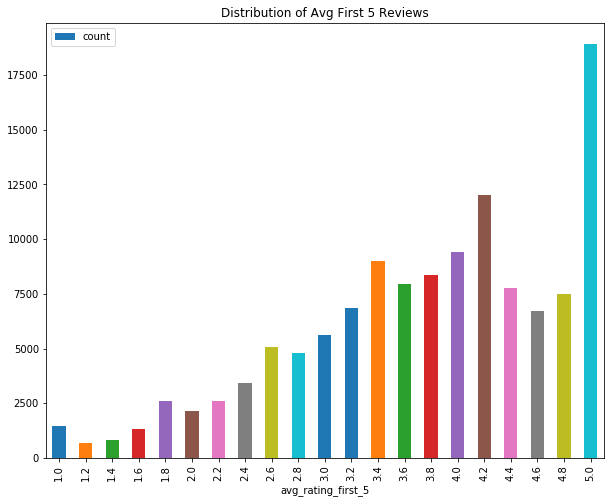

In [45]:
# distribution of the average rating of the first 5 reviews

yelp_star = yelp_df ['avg_rating_first_5'].value_counts().reset_index()
yelp_star.columns = ['avg_rating_first_5', 'count']
yelp_star.sort_values(by = 'avg_rating_first_5', inplace = True)
yelp_star.plot(
    kind = 'bar',
    x = 'avg_rating_first_5',
    y = 'count',
    figsize = (10,8),
    title = 'Distribution of Avg First 5 Reviews'
);


## What is the relationship between Review Count and Days to get to 5 Reviews?

In [47]:
yelp_df = pd.merge(yelp_df, bus_rev_more5 , on = 'business_id')
yelp_df.head()

,business_id,review_count,avg_rating_first_5,first_review_date,fifth_review_date,days_for_5_reviews
0,4JNXUYY8wbaaDmk3BPzlWw,7362,4.60,2005-10-10,2006-01-31,113 days
1,RESDUcs7fIiihp38-d6_6g,7006,4.60,2012-09-10,2012-09-12,2 days
2,K7lWdNUhCbcnEvI0NhGewg,5951,3.80,2010-12-18,2010-12-21,3 days
3,cYwJA2A6I12KNkm2rtXd5g,5448,4.20,2012-12-23,2012-12-26,3 days
4,DkYS3arLOhA8si5uUEmHOw,4870,4.00,2007-10-08,2008-01-11,95 days


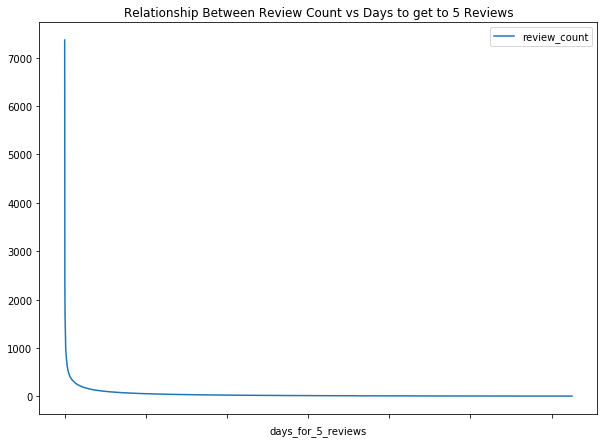

In [48]:
#Relationship Between Review Count vs Days to get to 5 Reviews

yelp_df.plot(
    kind = 'line',
    x = 'days_for_5_reviews',
    y = 'review_count',
    figsize = (10,8),
    title = 'Relationship Between Review Count vs Days to get to 5 Reviews'

);

It looks like getting faster reviews in correlated with higher review counts in the future

## What is the relationship between review count and the average rating of the first 5 reviews?

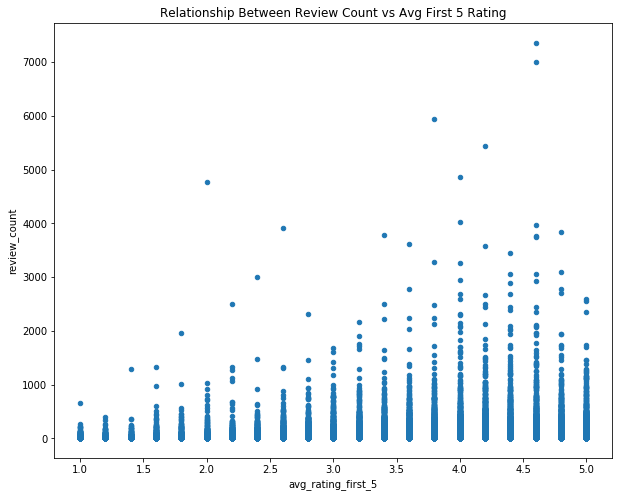

In [50]:
# plotting the scatter plot

yelp_df.plot(
    kind = 'scatter',
    x = 'avg_rating_first_5',
    y = 'review_count',
    figsize = (10,8),
    title = 'Relationship Between Review Count vs Avg First 5 Rating'

);

Let's try to build a Linear Regression model to see if there is a good/bad correlation between these two variables

In [51]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [52]:
 # Making X and y
    
feature = ['avg_rating_first_5']
X = yelp_df[feature]
y = yelp_df ['review_count']

# fit the model

lr.fit(X,y)

# print the lr score

print ('Intercept:', lr.intercept_)
print ('Coefficients:', lr.coef_)
print ('R-Squared:', lr.score(X, y))

Intercept: 16.567068103500297
Coefficients: [6.45312284]
R-Squared: 0.0030976869079362146


Extremely bad model!

## Adding True Stars to the first data set to get an accurating rating

From here, I would like to discover some interesting insights within the dataset using machine learning. In order to be more accurate in the results, finding out the "True Star" rating for each business is beneficial. In the 1st data set: Yelp Business dataset, the rating for each business is represented by 1.0,1.5,...,4.5, 5.0. We can get a more accurate rating representation for each business by averaging out the ratings from the 2nd data set: Yelp Review Dataset

In [53]:
# tstars shows the number of True star rating of a certain business

tstar= yelp_rev.groupby('business_id').mean().reset_index()[['business_id' , 'stars']]
column_names = ['business_id' , 'true_stars']
tstar.columns = ['business_id' , 'true_stars']
tstar.head(15)

,business_id,true_stars
0,--6MefnULPED_I942VcFNA,3.14
1,--7zmmkVg-IMGaXbuVd0SQ,3.85
2,--8LPVSo5i0Oo61X01sV9A,4.33
3,--9QQLMTbFzLJ_oT-ON3Xw,3.36
4,--9e1ONYQuAa-CB_Rrw7Tw,4.09
5,--DaPTJW3-tB1vP-PfdTEg,3.67
6,--DdmeR16TRb3LsjG0ejrQ,3.20
7,--EF5N7P70J_UYBTPypYlA,3.00
8,--EX4rRznJrltyn-34Jz1w,4.00
9,--FBCX-N37CMYDfs790Bnw,3.72


In [54]:
# let's try to do an inner join with yelp_bus and yelp_rev

yelp_df2 = pd.merge(left = yelp_bus, right = tstar , how = 'left', on = 'business_id')
yelp_df2.head(15)

,business_id,name,city,state,stars,review_count,is_open,categories,true_stars
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,4.00,22,1,Dentists;General Dentistry;Health & Medical;Or...,3.96
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,3.00,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,2.91
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,1.50,18,1,Departments of Motor Vehicles;Public Services ...,1.67
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,3.00,9,0,Sporting Goods;Shopping,2.78
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,3.50,115,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,3.48
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,4.00,5,1,Italian;Restaurants,4.00
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Las Vegas,NV,4.00,5,1,Real Estate Services;Real Estate;Home Services...,4.00
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Las Vegas,NV,1.50,9,1,Shopping;Sporting Goods,1.44
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",Wexford,PA,5.00,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food,4.80
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",Henderson,NV,5.00,7,1,Automotive;Auto Detailing,5.00


In [55]:
# comparing stars vs true stars

yelp_df2.groupby('stars').mean().reset_index()[['stars', 'true_stars']]


,stars,true_stars
0,1.00,1.04
1,1.50,1.53
2,2.00,2.02
3,2.50,2.50
4,3.00,3.02
5,3.50,3.52
6,4.00,4.00
7,4.50,4.49
8,5.00,4.96


They are very close and so we can assume that true stars are a good representation/ replacement for star rating

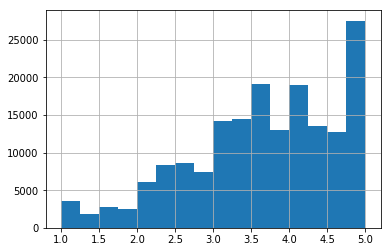

In [56]:
# true rating distribution
yelp_df2['true_stars'].hist( bins = 16);

## Predicting if a business is open by using random forest

In [57]:
yelp_df.head()

,business_id,review_count,avg_rating_first_5,first_review_date,fifth_review_date,days_for_5_reviews
0,4JNXUYY8wbaaDmk3BPzlWw,7362,4.60,2005-10-10,2006-01-31,113 days
1,RESDUcs7fIiihp38-d6_6g,7006,4.60,2012-09-10,2012-09-12,2 days
2,K7lWdNUhCbcnEvI0NhGewg,5951,3.80,2010-12-18,2010-12-21,3 days
3,cYwJA2A6I12KNkm2rtXd5g,5448,4.20,2012-12-23,2012-12-26,3 days
4,DkYS3arLOhA8si5uUEmHOw,4870,4.00,2007-10-08,2008-01-11,95 days


In [58]:
# adding the columns avg_rating_first_5 and days_for_5_reviews

yelp_final = pd.merge(yelp_df2 ,yelp_df.drop('review_count' , axis=1) , on = 'business_id')
yelp_final.drop (['name', 'city','state','categories', 'stars'], axis =1 , inplace = True)
yelp_final['days_for_5_reviews'] = yelp_final['days_for_5_reviews'].dt.days
yelp_final.head()

,business_id,review_count,is_open,true_stars,avg_rating_first_5,first_review_date,fifth_review_date,days_for_5_reviews
0,FYWN1wneV18bWNgQjJ2GNg,22,1,3.96,3.80,2011-09-21,2013-06-06,624
1,He-G7vWjzVUysIKrfNbPUQ,11,1,2.91,3.60,2011-10-05,2014-08-02,1032
2,KQPW8lFf1y5BT2MxiSZ3QA,18,1,1.67,3.00,2015-10-16,2016-11-03,384
3,8DShNS-LuFqpEWIp0HxijA,9,0,2.78,3.40,2012-07-19,2015-07-26,1102
4,PfOCPjBrlQAnz__NXj9h_w,115,1,3.48,2.80,2011-04-05,2011-08-22,139


In [59]:
# imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [60]:
# getting X and y

features = ['review_count' ,'true_stars','avg_rating_first_5', 'days_for_5_reviews']

X = yelp_final[features]
y = yelp_final['is_open']

# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state = 42)

# fitting the model

cls = RandomForestClassifier(n_estimators = 100)
cls.fit(X_train, y_train)

# printing the cls score

train_score = roc_auc_score(y_train, cls.predict_proba(X_train)[:,1])
test_score = roc_auc_score(y_test, cls.predict_proba(X_test)[:,1])

print ('Train ROC Score: {}'.format(train_score))
print ('Test ROC Score: {}'.format(test_score))

Train ROC Score: 0.9997936531974412
Test ROC Score: 0.623551304483595


The null model has an ROC Score of 0.5. Even though my testing ROC score is above 0.5 and is technically better than the null model, it is not an amazing model

In [61]:
# Extract the importance of each feature using .feature_importances_

list(zip(X.columns, cls.feature_importances_))

[('review_count', 0.15184613009933387),
 ('true_stars', 0.2474973158433471),
 ('avg_rating_first_5', 0.11795917043056897),
 ('days_for_5_reviews', 0.48269738362674985)]

From my model, it looks like the most important feature to having a business open is the number of days to get to 5 reviews followed by the rating of that business

## Finding out the most important features for a good review

In [62]:
yelp_rev.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [63]:
# adding good_comment column to this data set. If star >=4 , it's a good review

yelp_rev['is_good_review'] = np.where(yelp_rev['stars'] > 3 , 1 ,0)
yelp_rev.head(15)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,is_good_review
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,1
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,1
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,1
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,1
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,1
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0,1
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2,1
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0,1
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0,1


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# droppring anything that has blank reviews
df = yelp_rev.dropna(subset=['text'])

# train test split

train, test = train_test_split(df, train_size=0.055, test_size=0.055)

# defining our model

tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=50)
tfidf.fit(train['text'])

# fitting the model

X_train = tfidf.transform(train['text'])
y_train = train['is_good_review']

cls = RandomForestClassifier(n_estimators=50)
cls.fit(X_train, y_train)

# Calculate area under the ROC curve.

X_test = tfidf.transform(test['text'])
y_test = test['is_good_review']

y_pred = cls.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred))

0.8093635824583562


In [66]:
sorted(list(zip (tfidf.get_feature_names(), cls.feature_importances_)), key = lambda x: x[-1], reverse = True)

[('great', 0.07955068773303908),
 ('good', 0.03627114690235969),
 ('amazing', 0.035778760314711076),
 ('delicious', 0.033472399633303944),
 ('food', 0.033333489292227805),
 ('best', 0.0330467669904144),
 ('place', 0.03055351664659297),
 ('said', 0.030190768569679588),
 ('just', 0.02953044453254756),
 ('love', 0.029490223167983363),
 ('service', 0.027784494196173855),
 ('friendly', 0.02726176728599204),
 ('like', 0.02682018958526945),
 ('time', 0.02394531070069794),
 ('didn', 0.022800992510107525),
 ('definitely', 0.022568645041605738),
 ('don', 0.022192414957935704),
 ('really', 0.020629960522260467),
 ('nice', 0.01853021473344951),
 ('recommend', 0.017104437964395175),
 ('ve', 0.016909240041142203),
 ('better', 0.016754829556920713),
 ('ordered', 0.016691213957545054),
 ('got', 0.01646765651829472),
 ('little', 0.015302501192818894),
 ('pretty', 0.014992395584797327),
 ('people', 0.01496075763046337),
 ('did', 0.014713870175004497),
 ('went', 0.014698258955497923),
 ('order', 0.014620

We can see from going down the list, the signifant key words for a good review is "delicious", "place", "friendly". From our model, it would seem that having delicious food, a nice place and friendly service will affect the most when you want good reviews for your business/ restaurant.

# Conclusion

Here are my findings after exploring the Yelp datasets:

Things to know for new business owners who are thinking of using Yelp:
1. Yelpers tend to leave reviews after a highly positive/negative experience.
2. Most yelpers will only leave 1 review.
3. According to the model, getting faster reviews is beneficial.
4. For restaurant owners: Serving delivious food is the most important when it comes to good reviews; followed by the place and friendly staff! 

## What could have been done better?

1. Finding a good model to predict how the first few ratings impacted the review count/ future star rating
2. Implement further findings of the data into the analysis (ex. Less data nearing 2018)
3. Take into more consideration that our dataset is a subset of the entirety of Yelp Reviews.